In [74]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer
from sklearn import datasets
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


# Clustering Deep Dive on Iris Dataset

# Introduction to Problem

Clustering algorithms are a class of unsupervised machine learning techniques used to group similar data points together based on their characteristics or features. The goal of clustering is to partition a dataset into subsets, or clusters, where data points within the same cluster are more similar to each other than to those in other clusters.
For my project we will be exploring Multiple clustering algorithms and tuning there hyper parameters to find optimal results on multiple data sets and attempt to identify any common themes amongst the hyper parameters The choice of hyperparameters directly affects the quality of the clustering results. Suboptimal hyperparameter values can lead to poor clustering performance, resulting in inaccurate or inefficient cluster assignments. Hyperparameters control various aspects of the clustering process, such as the number of clusters, distance metrics, and convergence criteria. Different hyperparameter settings can produce vastly different cluster structures, impacting the interpretability and usefulness of the clustering solution. Well-tuned hyperparameters increase the generalization ability of clustering algorithms, enabling them to perform effectively on unseen data. By finding the optimal hyperparameters, clustering models can better capture the underlying structure of the data and make more accurate predictions for new data points.

Due to the overall importance of the hyperparameters I want to look into the effect they have and find some of the optimal Hyperparameters for sklearns Iris dataset by using EDA and various clustering algortithms that sklearn has implemetned.


# EDA

In [75]:
iris = sns.load_dataset("iris")
print(iris.head())
print(iris.shape)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


From the output, we can see that the iris dataset has 150 rows and 5 columns. The columns are sepal_length, sepal_width, petal_length, petal_width, and species. The species column is the target variable that we will use to train and the cluster learning models with various Hyperparameters.

Next, let's visualize the distribution of the features using histograms.

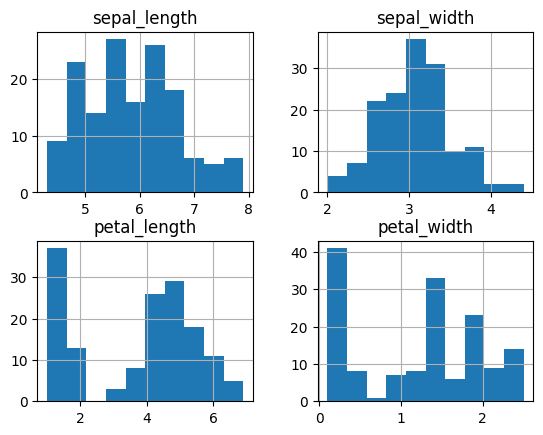

In [76]:
iris.hist()

plt.show()

From the histograms, we can observe that the features are continuous and have different ranges.

Now let's see the distribution of the our target

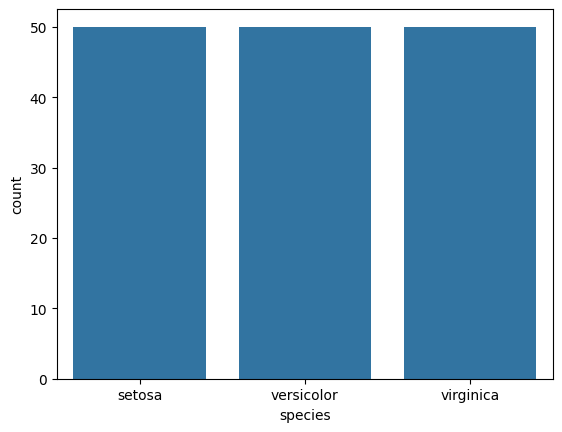

In [77]:
sns.countplot(x='species', data=iris, )
plt.show()

The species column is a categorical variable with three classes: setosa, versicolor, and virginica.All 3 contain exactly 50 values

Based off of the species column only have 3 values we know that the number of clusters we will want for testing Hyperparmeters will be 3


Now lets start to look at scatter plots of the features that Identify the spieces of the data points as well

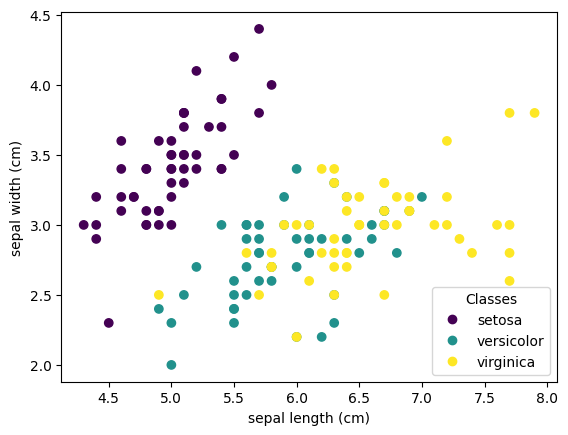

In [78]:
#plot function taken from https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

irisPlot = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(irisPlot.data[:, 0], irisPlot.data[:, 1], c=irisPlot.target)
ax.set(xlabel=irisPlot.feature_names[0], ylabel=irisPlot.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], irisPlot.target_names, loc="lower right", title="Classes"
)

From this scatter plot, The x-axis represents the first feature, sepal_length, and the y-axis represents the second feature, sepal_width. We can see the Setosa class is seperated from the other two. We can also see that there is significant overlap between Versicolor and Virfinca classes.

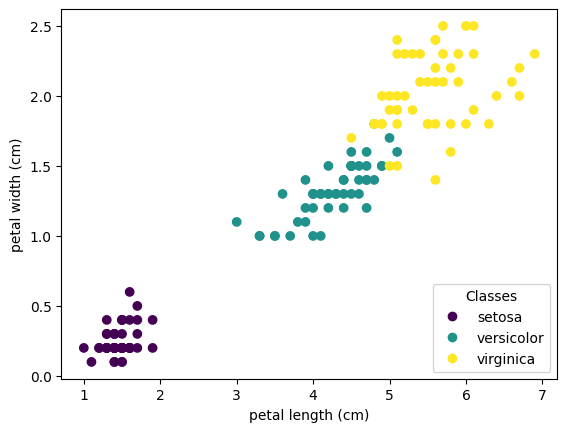

In [79]:
_, ax = plt.subplots()
scatter = ax.scatter(irisPlot.data[:, 2], irisPlot.data[:, 3], c=irisPlot.target)
ax.set(xlabel=irisPlot.feature_names[2], ylabel=irisPlot.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], irisPlot.target_names, loc="lower right", title="Classes"
)

From this scatter plot,The x-axis represents the third feature, petal_length, and the y-axis represents the fourth feature, petal_width. We can see the Setosa class agin is seperated  from the other two. We can also see that there is less overlap between Versicolor and Virginca classes.

Now lets look at all off the features plotted against each other to see if this trend of

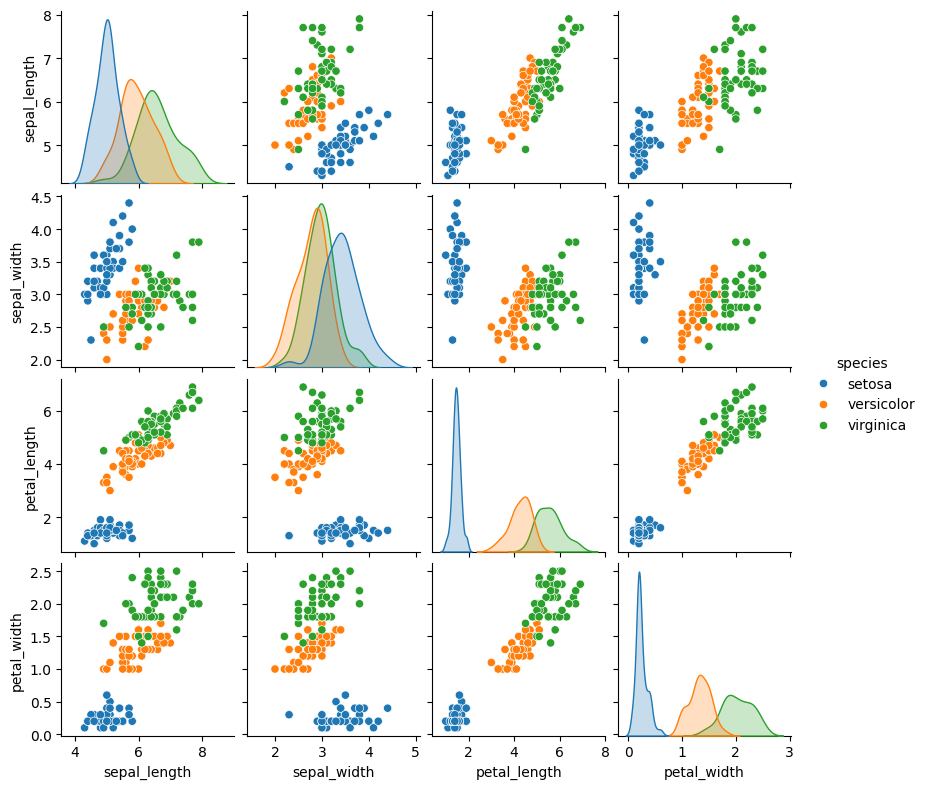

In [80]:
sns.pairplot(iris,
             hue='species', height=2)

Viewing this plot confirms the trend above indicating that our clustering models performance will mainly be determined on how well the model can identify the Versicolor and Virginica clusters

After analyzing the data and plots I do not believe that the data needs to be cleaned or scaled. This is primarily due to the data now missing input and there not being anyo utliers

# K-means Model Info and Analysis






**K-means Clustering:**


K-means clustering is one of the most popular and widely used clustering algorithms. It aims to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean (centroid). The algorithm iteratively assigns data points to the nearest centroid and updates the centroids based on the mean of the data points assigned to each cluster. This process continues until convergence, typically defined by a convergence criterion such as the change in centroids falling below a specified threshold or the maximum number of iterations being reached.


**Hyperparameters of K-means Clustering we will be testing:**


1. **Number of clusters (k):** This is the most crucial hyperparameter in K-means clustering, as it determines the number of clusters the algorithm will attempt to find in the dataset. Choosing an appropriate value for k is often done using domain knowledge, exploratory data analysis, or optimization techniques such as the elbow method or silhouette analysis.


2. **Maximum number of iterations:** This hyperparameter specifies the maximum number of iterations allowed for the algorithm to converge. If the algorithm does not converge within the specified number of iterations, it stops even if the centroids have not stabilized. Setting an appropriate maximum number of iterations prevents the algorithm from running indefinitely and helps control computational resources.


3. **Initialization method:** K-means clustering requires an initial guess for the cluster centroids before the iterative optimization process begins. The choice of initialization method can significantly impact the clustering results. Common initialization methods include:
   - Random initialization: Centroids are randomly selected from the data points in the dataset.
   - K-means++: Centroids are initialized using a probabilistic method that favors selecting centroids far apart from each other.



**K-means Model Evaluation Method**

The way we will be evaluating the performance of the models is through Adjusted Rand Index and Completeness Score. Below is information regarding what each is measuring.

**Adjusted Rand Index:** Measures from 0-1 the similarity between the cluster assignments and the ground truth labels, and a higher value indicates better clustering performance.


**Completeness Score:** Measures from 0 to 1 the extent to which all members of a true class are assigned to the same cluster and higher values indicating better clustering performance.

**HyperParmeter Testing and Analysis for Maximum number of iterations**

I choose to start the number of clusters at 3 so that we had at least as many clusters as targets.

Default Parameter value is: 8

In [128]:
from sklearn.cluster import KMeans
from sklearn import metrics
iris = load_iris()
X = iris.data
y = iris.target
nclusts=[3,4,5,6,7,8,9,10,11]

for i in nclusts:
    kmeans = None
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    y_kmeans =  None
    y_kmeans = kmeans.fit_predict(X)

    ari = metrics.adjusted_rand_score(iris.target,y_kmeans )
    completeness = metrics.completeness_score(iris.target, y_kmeans)

    print("Max itters is  %2d" % (i))
    print("Adjusted Rand Index:", ari)
    print("Completeness Score:", completeness)
    print(" ") #spacer

Max itters is   3
Adjusted Rand Index: 0.7302382722834697
Completeness Score: 0.7649861514489815
 
Max itters is   4
Adjusted Rand Index: 0.6460787233460947
Completeness Score: 0.650961349654246
 
Max itters is   5
Adjusted Rand Index: 0.6124537983599245
Completeness Score: 0.6006254897491421
 
Max itters is   6
Adjusted Rand Index: 0.44753353143336
Completeness Score: 0.5204922514601253
 
Max itters is   7
Adjusted Rand Index: 0.47625923885162735
Completeness Score: 0.5231050029098053
 
Max itters is   8
Adjusted Rand Index: 0.46378254211332315
Completeness Score: 0.5131512706305547
 
Max itters is   9
Adjusted Rand Index: 0.4493760001537774
Completeness Score: 0.49933312687336723
 
Max itters is  10
Adjusted Rand Index: 0.3891168410866896
Completeness Score: 0.46573704428528945
 
Max itters is  11
Adjusted Rand Index: 0.34673385905768944
Completeness Score: 0.44317760143131946
 


As expected from our EDA the optimal number of clusters is 3.

**HyperParmeter tuning/Analysis for Maximum number of iterations**

Default value is: 300


In [124]:
#code block for hyperparameter tuning
from sklearn.cluster import KMeans
from sklearn import metrics
iris = load_iris()
X = iris.data
y = iris.target
max_itters=[1,50,100,300,500,1000]

for i in max_itters:
    kmeans = None
    kmeans=KMeans(n_clusters=3,
                    max_iter= i )
    kmeans.fit(X)
    y_kmeans =  None
    y_kmeans = kmeans.fit_predict(X)

    ari = metrics.adjusted_rand_score(iris.target,y_kmeans )
    completeness = metrics.completeness_score(iris.target, y_kmeans)

    print("Max itters is  %2d" % (i))
    print("Adjusted Rand Index:", ari)
    print("Completeness Score:", completeness)
    print(" ") #spacer

Max itters is   1
Adjusted Rand Index: 0.7302382722834697
Completeness Score: 0.7649861514489815
 
Max itters is  50
Adjusted Rand Index: 0.7302382722834697
Completeness Score: 0.7649861514489815
 
Max itters is  100
Adjusted Rand Index: 0.7302382722834697
Completeness Score: 0.7649861514489815
 
Max itters is  300
Adjusted Rand Index: 0.7302382722834697
Completeness Score: 0.7649861514489815
 
Max itters is  500
Adjusted Rand Index: 0.7302382722834697
Completeness Score: 0.7649861514489815
 
Max itters is  1000
Adjusted Rand Index: 0.7302382722834697
Completeness Score: 0.7649861514489815
 


The above output shows that every value used for the parameter max_iter has the same score for Adjusted Rand Index and Completeness Score. These scores are also the same as our optimal number of clusters parameter score in the previous section. This indicates that the clusters converged after the first itteration. This is most likley due to the low amount of features in the dataset

**HyperParmeter tuning/Analysis for Initialization Method**

For this tuning we will not include the optimal number of clusters value of 3 instead we will use the deafult value of 8 to better see the impact.

In [129]:
from sklearn.cluster import KMeans
from sklearn import metrics
iris = load_iris()
X = iris.data
y = iris.target
init_method =['k-means++', 'random', 'random', 'random']

for i in init_method:
    kmeans = None
    kmeans=KMeans(init= i)
    kmeans.fit(X)
    y_means =  None
    y_means = kmeans.fit_predict(X)

    ari = metrics.adjusted_rand_score(iris.target,y_means )
    completeness = metrics.completeness_score(iris.target, y_means)

    print("Initialization Method is ", i )
    print("Adjusted Rand Index:", ari)
    print("Completeness Score:", completeness)
    print(" ") #spacer
    ari=None
    completeness = None

Initialization Method is  k-means++
Adjusted Rand Index: 0.4508080521689821
Completeness Score: 0.5063500805696742
 
Initialization Method is  random
Adjusted Rand Index: 0.4276832961800636
Completeness Score: 0.49778421106129
 
Initialization Method is  random
Adjusted Rand Index: 0.42104501025702906
Completeness Score: 0.4895134602346441
 
Initialization Method is  random
Adjusted Rand Index: 0.4379276826120263
Completeness Score: 0.5007934104046645
 


The above output indicates that the k-means++ is the best option for the parameter for the Iris dataset. This is due to the Centroids being initialized using a probabilistic method that favors selecting centroids far apart from each other instead of randomly selecting the centroids. Due to that I feel comfortable coming to the conclusion that for almost all datasets this is the optimal parameter choice  

# Hierarchical Clustering info and Analysis

**Hierarchical Clustering:**

Hierarchical clustering is a method of clustering that builds a hierarchy of clusters by either iteratively merging smaller clusters into larger ones (agglomerative) or recursively dividing larger clusters into smaller ones (divisive). The result is a tree-like structure called a dendrogram, which visualizes the relationships between data points and clusters at different levels of granularity.

**Hyperparameters of Hierarchical Clustering:**

1.   **Linkage Criterion:**
The linkage criterion determines how the distance between clusters is calculated when merging or splitting them. Common linkage criteria include:

  -   Single linkage: The distance between the closest points in the two clusters.
  -   Complete linkage: The distance between the farthest points in the two clusters.

  *  Average linkage: The average distance between all pairs of points in the two clusters.
  *Ward's linkage: Minimizes the increase in variance when merging clusters.
2. **Distance Metric:**
The distance metric specifies the measure used to compute the distance between data points. Common distance metrics include:

  * Euclidean distance: The straight-line distance between two points in Euclidean space.
  * Manhattan distance: The sum of the absolute differences between the coordinates of two points.
  * Cosine similarity: Measures the cosine of the angle between two vectors, often used for text or high-dimensional data.



The way we will be evaluating the performance of the models is through Adjusted Rand Index and Completeness Score. Below is information regarding what each is measuring.

**Adjusted Rand Index:** Measures from 0-1 the similarity between the cluster assignments and the ground truth labels, and a higher value indicates better clustering performance.


**Completeness Score:** Measures from 0 to 1 the extent to which all members of a true class are assigned to the same cluster and higher values indicating better clustering performance.

In [145]:
#code block for hyperparameter tuning
from sklearn.cluster import AgglomerativeClustering
iris = load_iris()
X = iris.data
y = iris.target
linkage =['ward', 'complete', 'average', 'single']
metric=['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
for i in linkage:
      for j in metric:
        if i=='ward' and j !='euclidean': #Ward only works with euclidean
          continue
        ac = AgglomerativeClustering(n_clusters=3, # chose 3 since we know the iris dataset has three different species
                             linkage=i,
                             metric=j)
        ac.fit(X)
        y_means =  None
        y_means = ac.fit_predict(X)

        ari = metrics.adjusted_rand_score(iris.target,y_means )
        completeness = metrics.completeness_score(iris.target, y_means)

        print("metric is", j , "linkage is", i )
        print("Adjusted Rand Index:", ari)
        print("Completeness Score:", completeness)
        print("Combined Score is:",ari+completeness)
        print(" ") #spacer
        ari=None
        completeness = None

metric is euclidean linkage is ward
Adjusted Rand Index: 0.7311985567707746
Completeness Score: 0.7795958005591144
Combined Score is: 1.510794357329889
 
metric is euclidean linkage is complete
Adjusted Rand Index: 0.6422512518362898
Completeness Score: 0.7454382753016932
Combined Score is: 1.387689527137983
 
metric is l1 linkage is complete
Adjusted Rand Index: 0.7322981167185344
Completeness Score: 0.80358854062315
Combined Score is: 1.5358866573416843
 
metric is l2 linkage is complete
Adjusted Rand Index: 0.6422512518362898
Completeness Score: 0.7454382753016932
Combined Score is: 1.387689527137983
 
metric is manhattan linkage is complete
Adjusted Rand Index: 0.7322981167185344
Completeness Score: 0.80358854062315
Combined Score is: 1.5358866573416843
 
metric is cosine linkage is complete
Adjusted Rand Index: 0.644447235392006
Completeness Score: 0.7734211932735964
Combined Score is: 1.4178684286656025
 
metric is euclidean linkage is average
Adjusted Rand Index: 0.7591987071071

**Breakdown and Analysis for above output**

1. Distance: Euclidean and Linkage: Ward
  *   Adjusted Rand Index: 0.731
  *   Completeness Score: 0.780
  *   Combined Score: 1.511

The Euclidean Distance with Ward linkage shows strong performance with a high Adjusted Rand Index of 0.731. Additionally, it achieves a Completeness Score of 0.780, suggesting that most members of each true class are assigned to the same cluster. The Combined Score of 1.511 indicates a good overall performance, making this method a promising choice for clustering tasks.


2. Distance: Euclidean and Linkage: Complete
    * Adjusted Rand Index: 0.642
    * Completeness Score: 0.745
    * Combined Score: 1.387

Despite having lower Adjusted Rand Index compared to the Ward linkage, the Euclidean distance with the Complete linkage still has good performance, indicating a high agreement with the true labels. The Completeness Score of 0.745 suggests that a significant portion of each true class is captured within individual clusters. However, the Combined Score of 1.387 falls behind other methods.


3. Distance: L1 and Linkage: Complete
  * Adjusted Rand Index: 0.732
  * Completeness Score: 0.804
  * Combined Score: 1.536

The L1 distance method with the Complete linkage  has a Adjusted Rand Index of 0.732 and a high Completeness Score of 0.804, this method captures both the agreement with true labels and the completeness of cluster assignments. The Combined Score of 1.536 shows its competitiveness among other methods.


4. Distance: L2 and Linkage: Complete
  * Adjusted Rand Index: 0.642
  * Completeness Score: 0.745
  * Combined Score: 1.387

The L2 distance method with the Complete linkage  has a moderate Adjusted Rand Index and Completeness Score, the Combined Score of 1.387 suggests a decent but not great performance compared to other methods.


5. Distance: Manhattan and Linkage: Complete
  * Adjusted Rand Index: 0.732
  * Completeness Score: 0.804
  * Combined Score: 1.536

Manhattan Distacne and with Complete linkage has strong performance across all metrics, indicating its effectiveness in capturing the underlying structure of the data. With a Combined Score of 1.536, it stands out as one of the top-performing methods in this evaluation.


6. Distance: Cosine and Linkage: Complete
  * Adjusted Rand Index: 0.644
  * Completeness Score: 0.773
  * Combined Score: 1.417

The Cosine and Complete criterion exhibits a decent performance with a relatively high Completeness Score of 0.773. However, its Adjusted Rand Index and Combined Score fall short compared to some other methods, suggesting potential limitations in capturing the clustering structure effectively.

7. Distance: Euclidean and Linkage: Average
  * Adjusted Rand Index: 0.759
  * Completeness Score: 0.816
  * Combined Score: 1.575

The Euclidean and Average criterion emerges is one of the top-performing methods in this evaluation, having the highest Adjusted Rand Index and Completeness Score among all methods. With a Combined Score of 1.575, it demonstrates exceptional performance and robustness in capturing both agreement with true labels and completeness of cluster assignments.

8. Distance: L1 and Linkage: Average
  * Adjusted Rand Index: 0.745
  * Completeness Score: 0.786
  * Combined Score: 1.530

The L1 and Average criterion also achieves strong performance, with high scores in both Adjusted Rand Index and Completeness Score. Its Combined Score of 1.530 reflects its competitiveness and effectiveness in clustering tasks, making it a promising choice for various applications.

9. Distance: L2 and Linkage: Average
  * Adjusted Rand Index: 0.759
  * Completeness Score: 0.816
  * Combined Score: 1.575

The L2 and Average criterion demonstrates exceptional performance, achieving the high scores in both Adjusted Rand Index and Completeness Score. With a Combined Score of 1.575, it stands out as a top-performing method in this evaluation.

10. Distance: Manhattan and Linkage: Average
  * Adjusted Rand Index: 0.745
  * Completeness Score: 0.786
  * Combined Score: 1.530

The Manhattan and Average criterion has high scores in both Adjusted Rand Index and Completeness Score. Its Combined Score of 1.530 reflects its effectiveness and competitiveness in clustering tasks, making it a viable choice for various datasets and applications.

11. Distance: Cosine and Linkage: Average
  * Adjusted Rand Index: 0.558
  * Completeness Score: 0.951
  * Combined Score: 1.509

The Cosine and Average criterion stands out with the highest Completeness Score among all methods. However, its relatively lower Adjusted Rand Index and Combined Score indicate potential limitations in capturing the agreement with true labels.

12. Distance: Euclidean and Linkage: Single
  * Adjusted Rand Index: 0.564
  * Completeness Score: 0.920
  * Combined Score: 1.484

The Euclidean and Single criterion has a high Completeness Score, indicating that most members of each true class are captured within individual clusters. However, its relatively lower Adjusted Rand Index and Combined Score compared to other methods suggest potential limitations in capturing the overall agreement with true labels and the clustering structure effectively.

In conclusion, the choice of clustering method should be carefully considered based on the specific characteristics of the dataset and the objectives of the analysis. While some methods excel in capturing agreement with true labels, others may prioritize the completeness of cluster assignments. Ultimately, the Euclidean linkage with the Average criterion emerges as one of the top-performing methods, demonstrating exceptional performance across all metrics.